In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## note to self why not simply classify then decide how many /5 justify as std dev being useless here as previosly

/tmp/ipykernel_437919/3111314184.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels,fontsize=16)
/tmp/ipykernel_437919/3111314184.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels,fontsize=16)
/tmp/ipykernel_437919/3111314184.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels,fontsize=16)


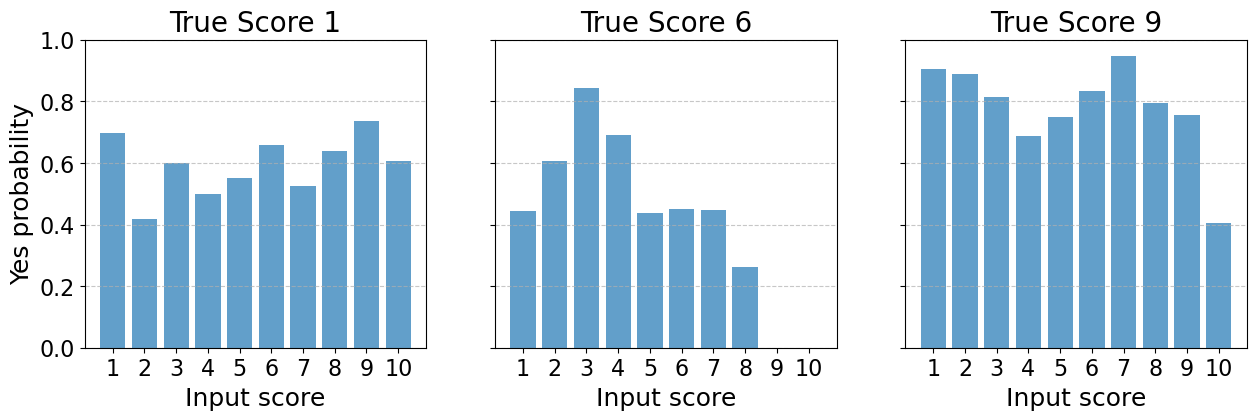

In [6]:
df = pd.read_csv('data/HB_classifier_results.csv')
df.head()
score_1 = df[df['scenario']=='example_score_1']
score_6 = df[df['scenario']=='example_score_6']
score_9 = df[df['scenario']=='example_score_9']

def aggrigate_df_scores(df):
    means=[]
    stds=[]
    for i in range (1,11):
        temp_df = df[df['used_new_score']==i]
        probs = temp_df['yes_prob']
        means.append(np.mean(probs))
        stds.append(np.std(probs))
    return means, stds


def plotter(ax, df, title=None,first=False):
    means, stds = aggrigate_df_scores(df)

    x = range(1, 11)
    y = np.arange(0, 1.1, 0.2)
    x_labels = [str(i) for i in x]
    y_labels = [f"{i:.1f}" for i in y]
    
    ax.bar(x, means, capsize=5, alpha=0.7)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=16)
    ax.set_yticklabels(y_labels,fontsize=16)
    ax.set_xlabel("Input score", fontsize=18)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if first:
        ax.set_ylabel("Yes probability", fontsize=18)
    ax.set_ylim(0,1)
    if title:
        ax.set_title(title, fontsize=20)

# Create row of 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

plotter(axes[0], score_1, title="True Score 1", first=True)
plotter(axes[1], score_6, title="True Score 6")
plotter(axes[2], score_9, title="True Score 9")

#plt.tight_layout()
plt.savefig("graphs/score_to_yes_prob.pdf", bbox_inches='tight')
plt.show()
        

In [20]:
score_6


,scenario,source_score,used_new_score,iteration,yes_prob,no_prob
500,example_score_6,6,1,1,0.621094,0.376953
501,example_score_6,6,1,2,0.000111,1.000000
502,example_score_6,6,1,3,0.000103,1.000000
503,example_score_6,6,1,4,0.000144,1.000000
504,example_score_6,6,1,5,1.000000,0.000324
...,...,...,...,...,...,...
995,example_score_6,6,10,46,0.000088,1.000000
996,example_score_6,6,10,47,0.000078,1.000000
997,example_score_6,6,10,48,0.000179,1.000000
998,example_score_6,6,10,49,0.000149,1.000000
